In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split    
from sklearn import metrics                             
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
column_names = ['sepal length', 'sepal width', 'petal length', 'petal width','Class']
# load dataset
data = pd.read_csv("D:\Dataset\csvDataset\iris.csv")

# Display the first five rows of our dataset
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [17]:
# split dataset in features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values
#X
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 


scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Mean Error Rate')

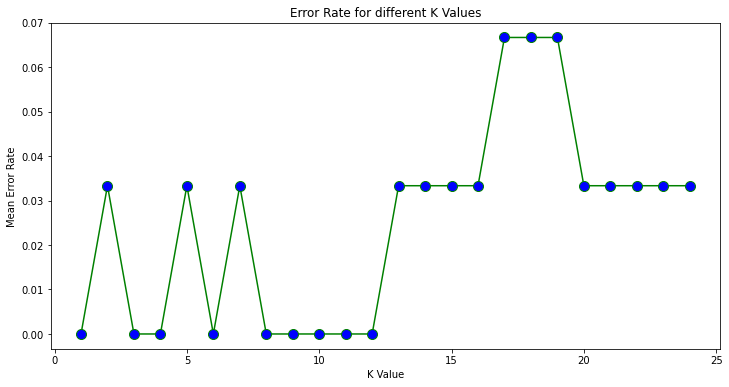

In [11]:
# Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1, 25), error, color='Green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate for different K Values')
plt.xlabel('K Value')
plt.ylabel('Mean Error Rate')

In [14]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

# Use the loaded pickled model to make predictions 
y_pred=classifier.predict(X_test) 

# y_pred = classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Use the loaded pickled model to make predictions 
y_pred=classifier.predict(X_test) 

# y_pred = classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

# Use the loaded pickled model to make predictions 
y_pred=classifier.predict(X_test) 

# y_pred = classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9733333333333334
[[24  0  0]
 [ 0 23  1]
 [ 0  1 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.96      0.96      0.96        24
           2       0.96      0.96      0.96        27

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



In [16]:
# You can also make a prediction for a single item, for e=xample:
# sepal length=7.2, sepal width=3,petal length=5.8,petal width=1.6, label=3
classifier.predict([[7.2, 3, 5.8, 1.6]])
# classifier.predict([[5, 2.3, 3.3, 1]])

array([3], dtype=int64)